In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.drop(['RowNumber'], inplace=True, axis=1)

In [5]:
data.isnull().sum()

,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [8]:
data.drop(columns=['CustomerId', 'Surname'], inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [10]:
object_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(exclude=['object']).columns

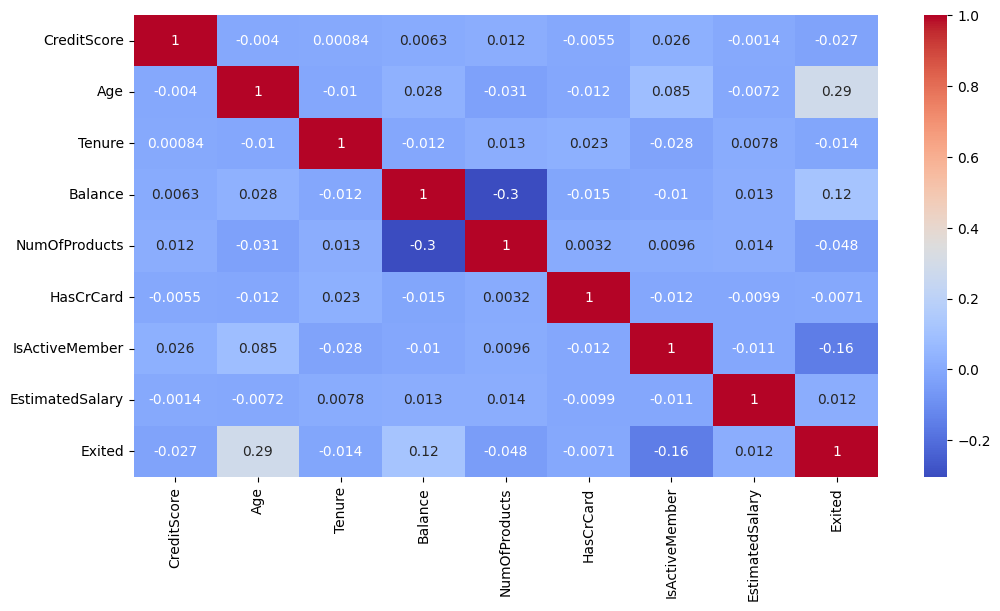

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

In [12]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


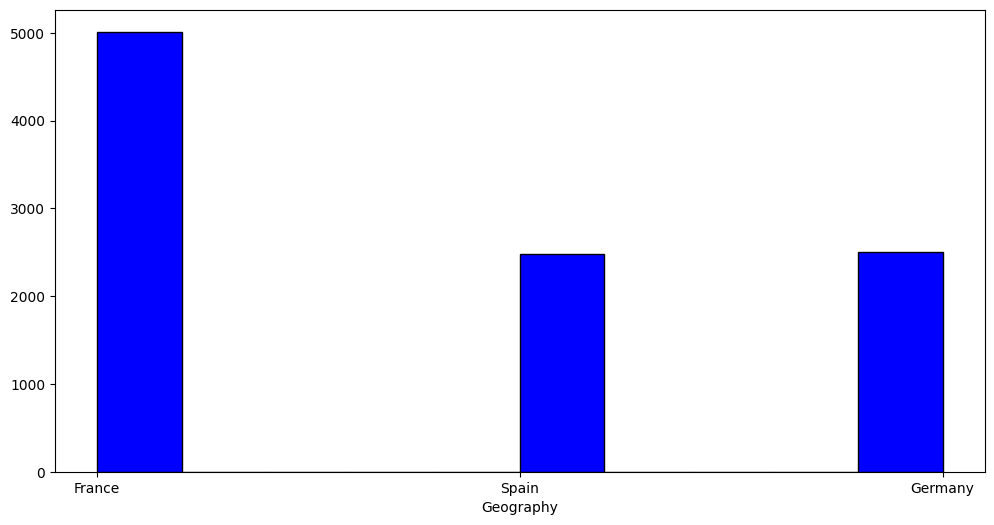

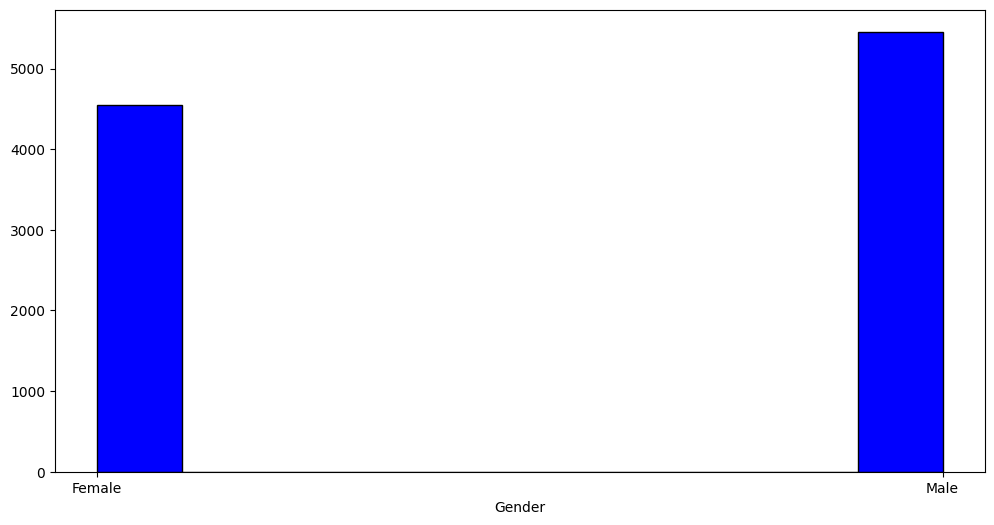

In [13]:
for col in object_cols:
  plt.figure(figsize=(12,6))
  plt.hist(data[col], color='blue', edgecolor='black')
  plt.xlabel(col)
  plt.show()

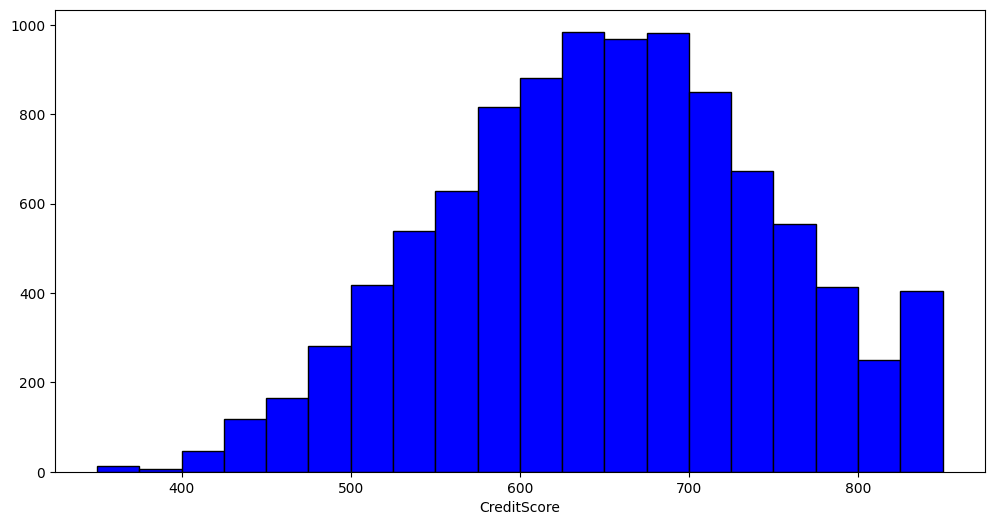

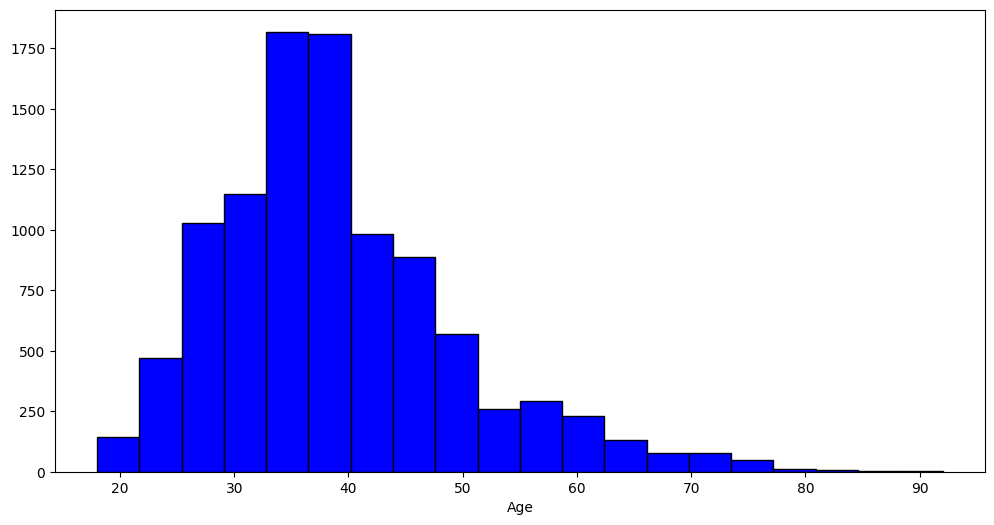

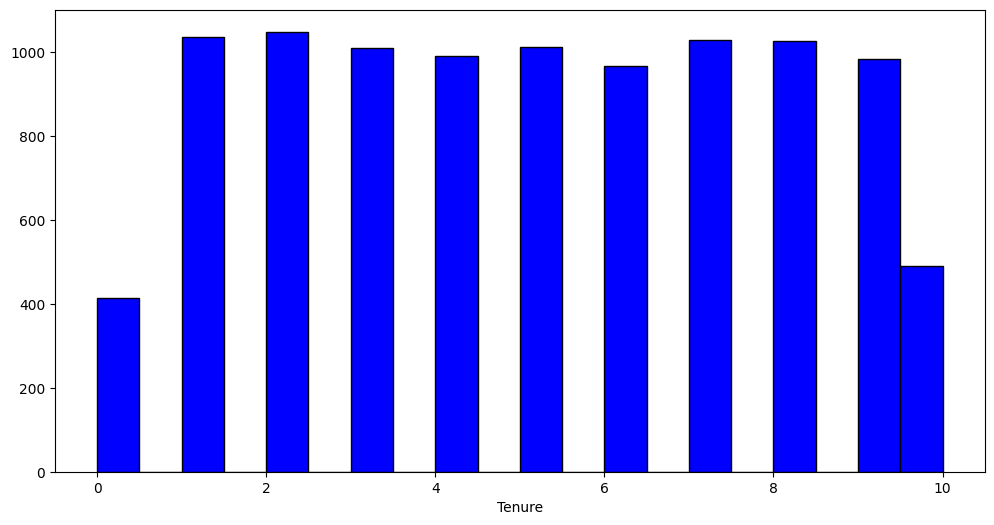

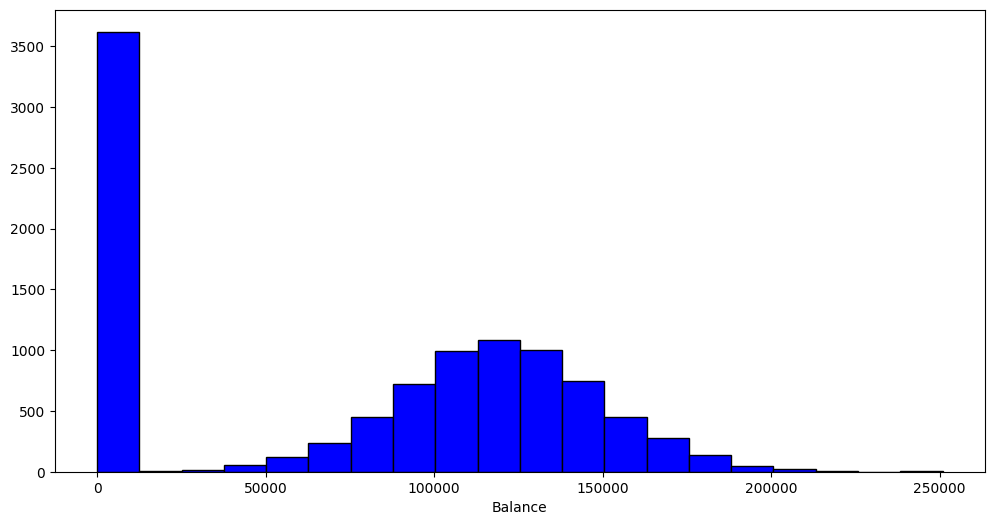

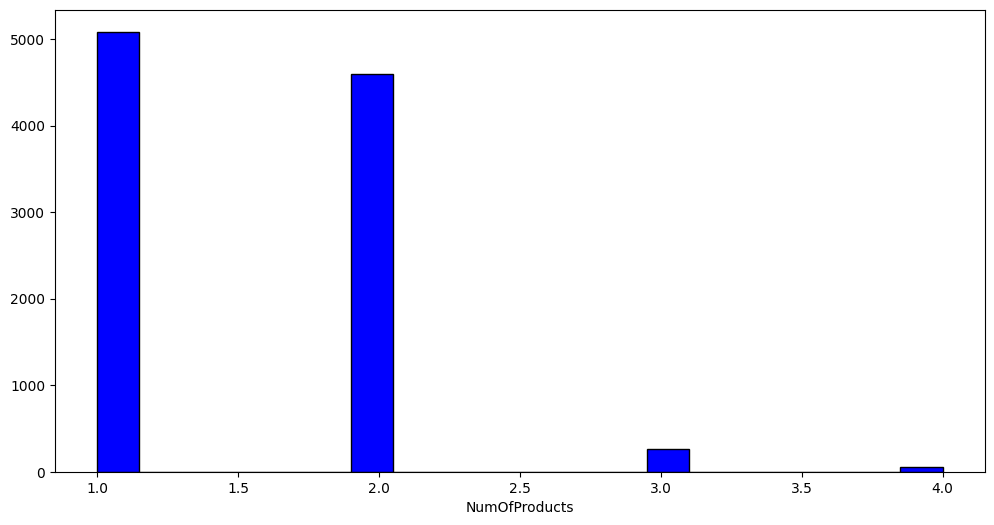

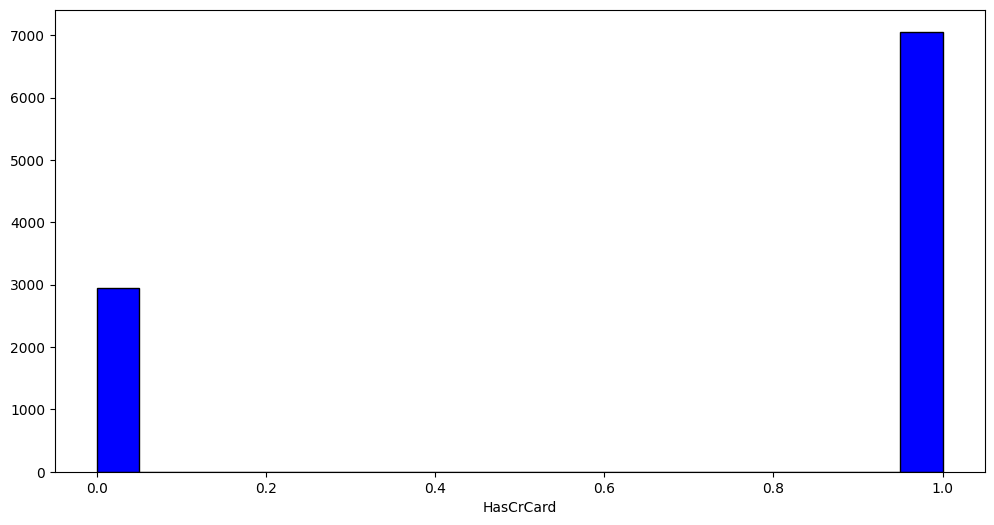

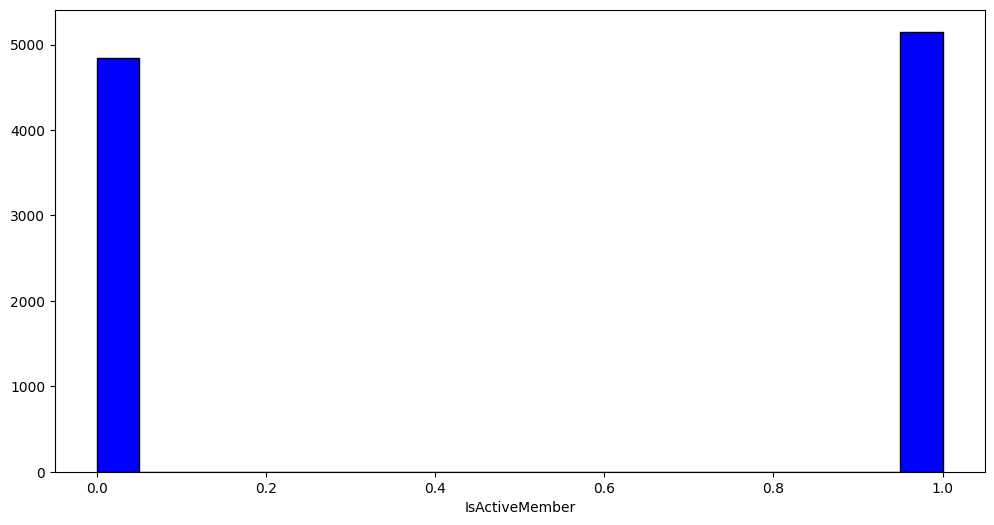

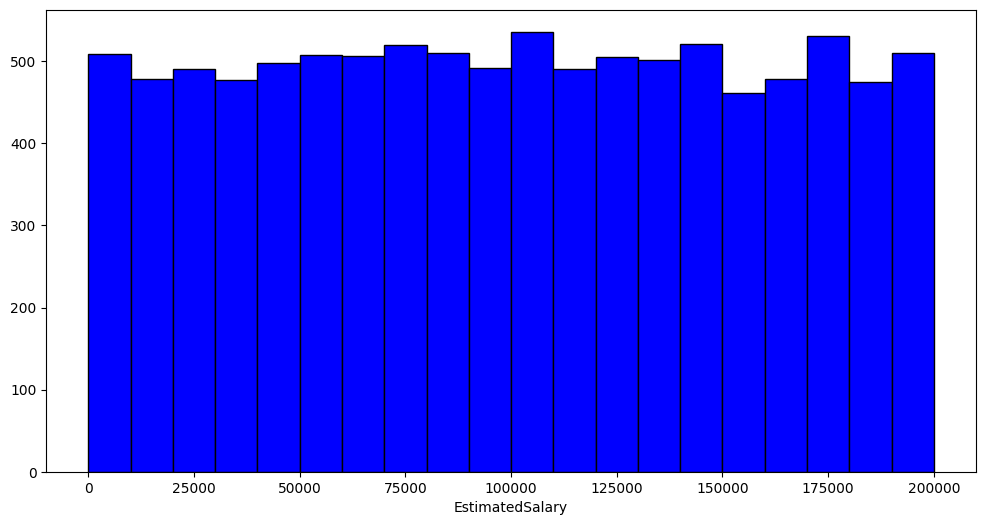

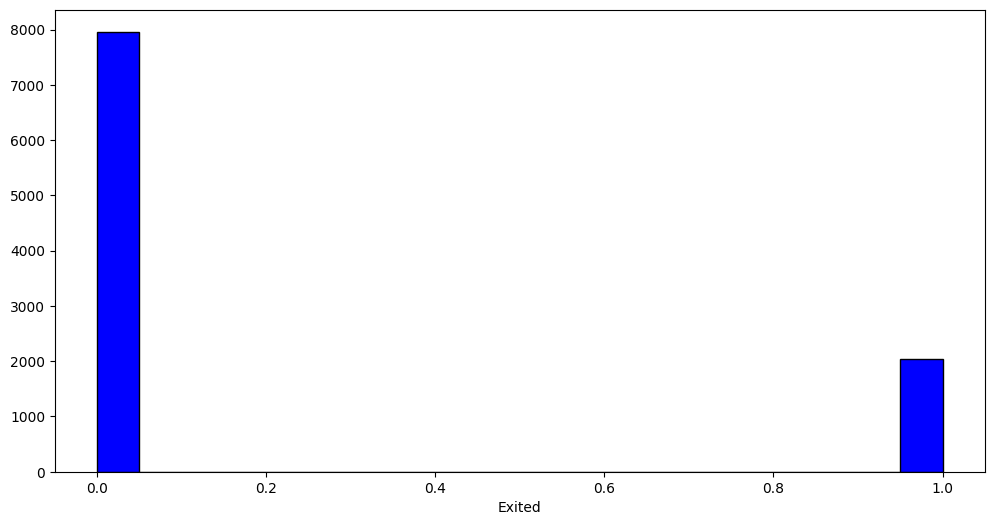

In [14]:
for col in numerical_cols:
  plt.figure(figsize=(12,6))
  plt.hist(data[col], bins=20, color='blue', edgecolor='black')
  plt.xlabel(col)
  plt.show()

In [15]:
data = data.join(pd.get_dummies((data.Gender), dtype=int)).drop(['Gender'], axis = 1)
data = data.join(pd.get_dummies((data.Geography), dtype=int)).drop(['Geography'], axis = 1)

In [16]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1,0


In [17]:
data.drop(columns=['IsActiveMember', 'NumOfProducts', 'HasCrCard'], inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   EstimatedSalary  10000 non-null  float64
 5   Exited           10000 non-null  int64  
 6   Female           10000 non-null  int64  
 7   Male             10000 non-null  int64  
 8   France           10000 non-null  int64  
 9   Germany          10000 non-null  int64  
 10  Spain            10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [19]:
data.Exited.value_counts()

,count
Exited,
0,7963
1,2037


In [20]:

x = data.drop('Exited', axis=1)
y = data['Exited']


In [21]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [22]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9254 to 7270
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      8000 non-null   int64  
 1   Age              8000 non-null   int64  
 2   Tenure           8000 non-null   int64  
 3   Balance          8000 non-null   float64
 4   EstimatedSalary  8000 non-null   float64
 5   Female           8000 non-null   int64  
 6   Male             8000 non-null   int64  
 7   France           8000 non-null   int64  
 8   Germany          8000 non-null   int64  
 9   Spain            8000 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 687.5 KB


In [23]:
#SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [24]:

y_train_smote.value_counts()


,count
Exited,
0,6356
1,6356


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
x_train_smote = scaler.fit_transform(x_train_smote)
x_test = scaler.transform(x_test)

In [27]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train_smote, y_train_smote)
reg.score(x_test, y_test)

0.794

In [28]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train_smote, y_train_smote)
forest.score(x_test, y_test)

0.05193911497250414

In [29]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train_smote, y_train_smote)
xgb.score(x_test, y_test)

0.803

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout


In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(10,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
  ])
model.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
history = model.fit(x_train_smote, y_train_smote, validation_split=0.1, epochs=25)

Epoch 1/25
358/358 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7547 - loss: 0.5048 - val_accuracy: 0.8498 - val_loss: 0.2492
Epoch 2/25
358/358 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8136 - loss: 0.3923 - val_accuracy: 0.8546 - val_loss: 0.2389
Epoch 3/25
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8199 - loss: 0.3841 - val_accuracy: 0.8577 - val_loss: 0.2348
Epoch 4/25
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8251 - loss: 0.3771 - val_accuracy: 0.8679 - val_loss: 0.2252
Epoch 5/25
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8253 - loss: 0.3724 - val_accuracy: 0.8624 - val_loss: 0.2300
Epoch 6/25
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8296 - loss: 0.3712 - val_accuracy: 0.8640 - val_loss: 0.2284
Epoch 7/25
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8318 - loss: 0.3656 - val_accuracy: 0.8695 - val_loss: 0.2227
Epoch 8/25
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8285 - loss: 0.3650 - val_accuracy: 0.

In [33]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8068 - loss: 0.4327
0.8190000057220459


In [34]:
y_pred = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [35]:
y_pred[0]
y_pred_label = [int(np.round(i)) for i in y_pred]

<ipython-input-35-3787552431>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_label = [int(np.round(i)) for i in y_pred]


In [36]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred_label)
print(conf_mat)

[[1486  121]
 [ 241  152]]


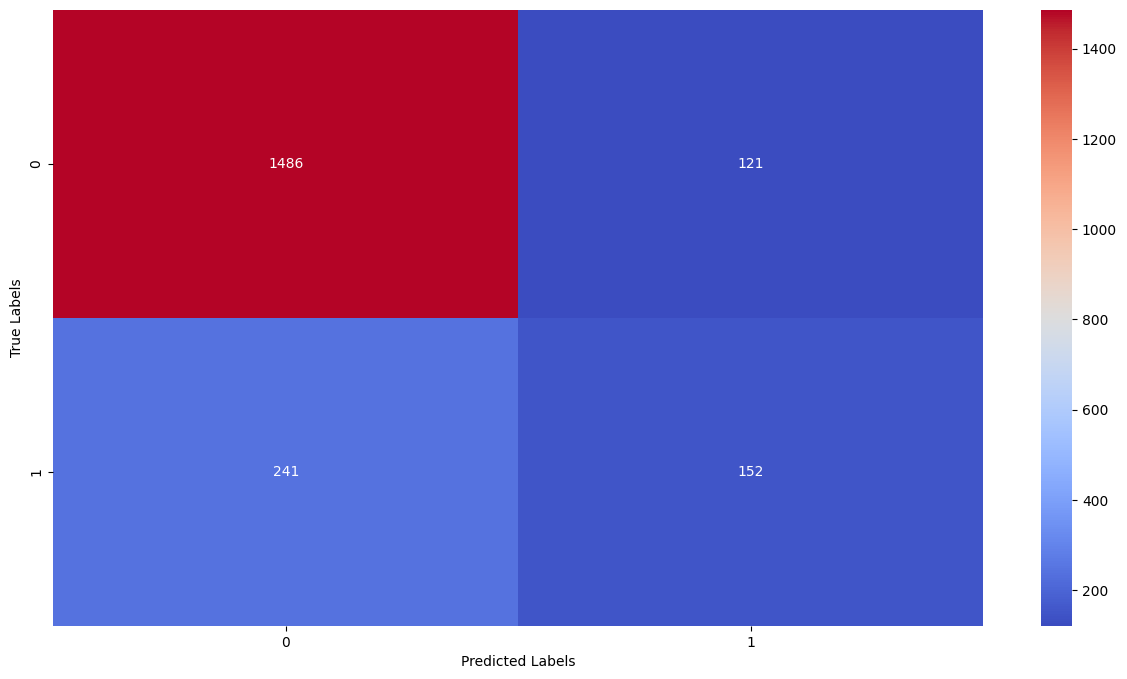

In [37]:
plt.figure(figsize=(15,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='coolwarm')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

**SHAP**

In [38]:
'''import shap'''

'import shap'

In [39]:
'''explainer = shap.Explainer(model, x_train_smote)
x_sample = x_train_smote[:100]
shap_values = explainer(x_sample)
shap.plots.waterfall(shap_values[0])
shap.plots.beeswarm(shap_values)'''

'explainer = shap.Explainer(model, x_train_smote)\nx_sample = x_train_smote[:100]\nshap_values = explainer(x_sample)\nshap.plots.waterfall(shap_values[0])\nshap.plots.beeswarm(shap_values)'

In [40]:
#feature_names = x_train.columns.tolist()

In [41]:
#import joblib
#joblib.dump(feature_names, 'columns.pkl')

In [42]:
#joblib.dump(scaler, 'scaler.pkl')

In [47]:
model.save("churn_model_tf.keras")